In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p /content/drive/MyDrive/amazon_ml_challenge_2025/{data,images/train,images/test,src}


In [ ]:
!pip install pandas tqdm requests


In [ ]:
import pandas as pd
import os
import sys
from tqdm.notebook import tqdm

# 2️⃣ Set base paths
BASE_DIR = "/content/drive/MyDrive/amazon_ml_challenge_2025"
DATA_DIR = f"{BASE_DIR}/data"
TRAIN_DIR = f"{BASE_DIR}/images/train"
TEST_DIR  = f"{BASE_DIR}/images/test"
SRC_DIR   = f"{BASE_DIR}/src"

# 3️⃣ Add src folder to path and import utils.py
sys.path.append(SRC_DIR)
from utils import download_images   # Amazon provided function

# 4️⃣ Load train and test CSVs
train_df = pd.read_csv(f"{DATA_DIR}/train.csv")
test_df  = pd.read_csv(f"{DATA_DIR}/test.csv")

# 5️⃣ Convert image links to lists
train_links = train_df['image_link'].tolist()
test_links  = test_df['image_link'].tolist()

# 6️⃣ Batch download function
def batch_download(image_links, save_folder, batch_size=20000):
    """
    Download images in batches to avoid Colab disconnection.
    """
    total = len(image_links)
    for start in range(0, total, batch_size):
        end = min(start + batch_size, total)
        batch = image_links[start:end]
        print(f"\n⬇️ Downloading images {start+1}-{end} out of {total} to {save_folder}")
        download_images(batch, save_folder)
    print(f"\n✅ All images attempted for folder: {save_folder}")

# 7️⃣ Download train and test images in batches
batch_download(train_links, TRAIN_DIR, batch_size=20000)  # 20K images per batch
batch_download(test_links, TEST_DIR, batch_size=20000)    # 20K images per batch

# 8️⃣ Verify downloads
print("\n🎯 Verification")
print("Train images:", len(os.listdir(TRAIN_DIR)))
print("Test images:", len(os.listdir(TEST_DIR)))



⬇️ Downloading images 1-20000 out of 75000 to /content/drive/MyDrive/amazon_ml_challenge_2025/images/train


100%|██████████| 20000/20000 [00:09<00:00, 2132.45it/s]



⬇️ Downloading images 20001-40000 out of 75000 to /content/drive/MyDrive/amazon_ml_challenge_2025/images/train


 95%|█████████▍| 18942/20000 [00:06<00:00, 3017.38it/s]

HTTP Error 404: Not Found


100%|██████████| 20000/20000 [00:07<00:00, 2817.14it/s]



⬇️ Downloading images 40001-60000 out of 75000 to /content/drive/MyDrive/amazon_ml_challenge_2025/images/train


100%|██████████| 20000/20000 [00:10<00:00, 1954.01it/s]



⬇️ Downloading images 60001-75000 out of 75000 to /content/drive/MyDrive/amazon_ml_challenge_2025/images/train


100%|██████████| 15000/15000 [03:15<00:00, 76.86it/s]



✅ All images attempted for folder: /content/drive/MyDrive/amazon_ml_challenge_2025/images/train

⬇️ Downloading images 1-20000 out of 75000 to /content/drive/MyDrive/amazon_ml_challenge_2025/images/test


100%|██████████| 20000/20000 [05:53<00:00, 56.55it/s]



⬇️ Downloading images 20001-40000 out of 75000 to /content/drive/MyDrive/amazon_ml_challenge_2025/images/test


100%|██████████| 20000/20000 [05:46<00:00, 57.69it/s]



⬇️ Downloading images 40001-60000 out of 75000 to /content/drive/MyDrive/amazon_ml_challenge_2025/images/test


  9%|▉         | 1875/20000 [00:37<09:22, 32.23it/s]

HTTP Error 404: Not Found


100%|██████████| 20000/20000 [05:50<00:00, 57.14it/s]



⬇️ Downloading images 60001-75000 out of 75000 to /content/drive/MyDrive/amazon_ml_challenge_2025/images/test


100%|██████████| 15000/15000 [04:15<00:00, 58.65it/s]



✅ All images attempted for folder: /content/drive/MyDrive/amazon_ml_challenge_2025/images/test

🎯 Verification
Train images: 72287
Test images: 72221



Displaying first 5 images from /content/drive/MyDrive/amazon_ml_challenge_2025/images/train (72287 total images)


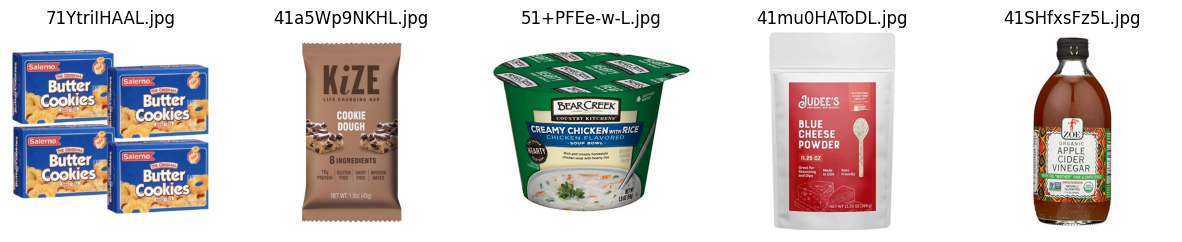


Displaying first 5 images from /content/drive/MyDrive/amazon_ml_challenge_2025/images/test (72221 total images)


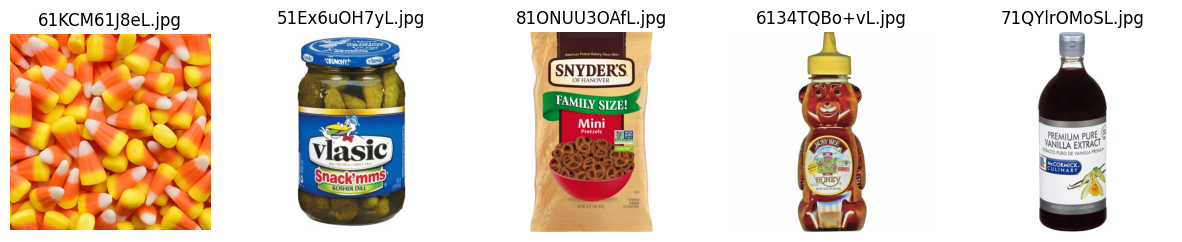

In [ ]:
import os
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

# Paths
TRAIN_DIR = "/content/drive/MyDrive/amazon_ml_challenge_2025/images/train"
TEST_DIR  = "/content/drive/MyDrive/amazon_ml_challenge_2025/images/test"

# Function to display first n images from a folder
def show_first_images(folder, n=5):
    image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg','.jpeg','.png','.webp'))]
    print(f"\nDisplaying first {n} images from {folder} ({len(image_files)} total images)")

    plt.figure(figsize=(15,5))
    for i, img_file in enumerate(image_files[:n]):
        img_path = os.path.join(folder, img_file)
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_file)
    plt.show()

# Display first 5 train images
show_first_images(TRAIN_DIR, n=5)

# Display first 5 test images
show_first_images(TEST_DIR, n=5)


In [ ]:
import pandas as pd
DATA_DIR = "/content/drive/MyDrive/amazon_ml_challenge_2025/data"

train_df = pd.read_csv(f"{DATA_DIR}/train.csv")
test_df  = pd.read_csv(f"{DATA_DIR}/test.csv")

print(train_df.head())
print(test_df.head())


   sample_id                                    catalog_content  \
0      33127  Item Name: La Victoria Green Taco Sauce Mild, ...   
1     198967  Item Name: Salerno Cookies, The Original Butte...   
2     261251  Item Name: Bear Creek Hearty Soup Bowl, Creamy...   
3      55858  Item Name: Judee’s Blue Cheese Powder 11.25 oz...   
4     292686  Item Name: kedem Sherry Cooking Wine, 12.7 Oun...   

                                          image_link  price  
0  https://m.media-amazon.com/images/I/51mo8htwTH...   4.89  
1  https://m.media-amazon.com/images/I/71YtriIHAA...  13.12  
2  https://m.media-amazon.com/images/I/51+PFEe-w-...   1.97  
3  https://m.media-amazon.com/images/I/41mu0HAToD...  30.34  
4  https://m.media-amazon.com/images/I/41sA037+Qv...  66.49  
   sample_id                                    catalog_content  \
0     100179  Item Name: Rani 14-Spice Eshamaya's Mango Chut...   
1     245611  Item Name: Natural MILK TEA Flavoring extract ...   
2     146263  Item Name:

In [ ]:
import re

def clean_text(text):
    text = str(text).lower()                  # lowercase
    text = re.sub(r'[^a-z0-9\s]', ' ', text) # remove special characters
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces
    return text

train_df['clean_text'] = train_df['catalog_content'].apply(clean_text)
test_df['clean_text']  = test_df['catalog_content'].apply(clean_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_text = tfidf.fit_transform(train_df['clean_text'])
X_test_text  = tfidf.transform(test_df['clean_text'])
y_train = train_df['price'].values


In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train_text, y_train)

# Make predictions
y_pred = model.predict(X_test_text)


In [ ]:
submission = pd.DataFrame({
    'sample_id': test_df['sample_id'],
    'price': y_pred
})

submission.to_csv("/content/drive/MyDrive/amazon_ml_challenge_2025/submission_day1.csv", index=False)
print("✅ Submission file saved")


✅ Submission file saved


In [ ]:
!mkdir -p /content/drive/MyDrive/amazon_ml_challenge_2025/{data,images/train,images/test,src}
!ls /content/drive/MyDrive/amazon_ml_challenge_2025/images


test  train


In [ ]:
from google.colab import drive

# Unmount any previous mount
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.
